In [1]:
try:
    import recirq
except ImportError:
    !pip install -q git+https://github.com/quantumlib/ReCirq

In [2]:
# from qiskit.qasm import Qasm
# from qiskit import QuantumCircuit

# circuit = QuantumCircuit.from_qasm_str(open('.\QASMBench\large\qft_n20\qft_n20.qasm', 'r').read())

In [3]:
import cirq
import recirq
import networkx as nx
from cirq.contrib.svg import SVGCircuit
import numpy as np

In [4]:
from pytket.predicates import CompilationUnit, ConnectivityPredicate
from pytket.passes import SequencePass, RoutingPass, DecomposeSwapsToCXs
from pytket.routing import GraphPlacement

In [5]:
import recirq

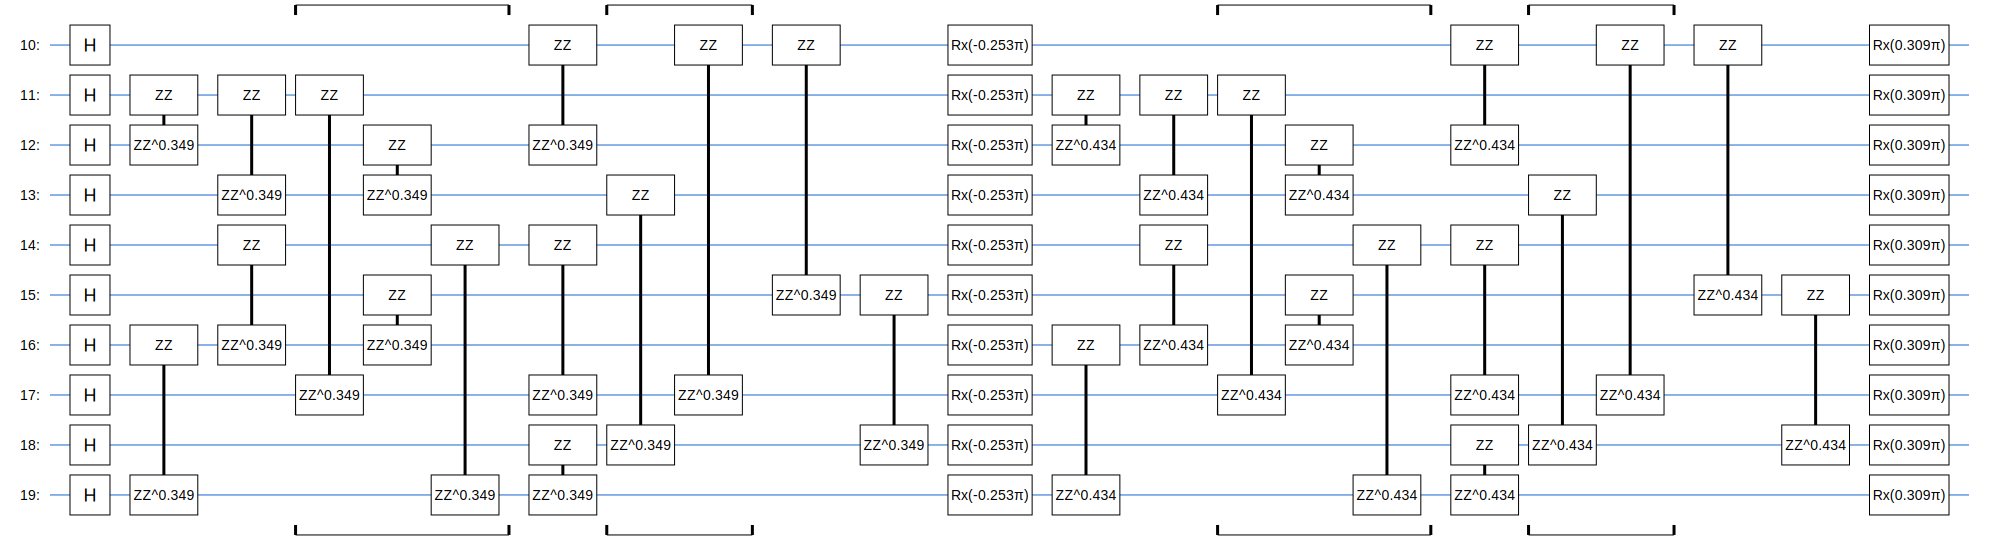

In [7]:
from recirq.qaoa.problem_circuits import get_generic_qaoa_circuit
from recirq.qaoa.gates_and_compilation import compile_problem_unitary_to_arbitrary_zz, \
    compile_driver_unitary_to_rx

problem_graph = nx.random_regular_graph(d=3, n=10)
nx.set_edge_attributes(problem_graph, values=1, name='weight')
circuit_qubits = cirq.LineQubit.range(10, 20)
gammas = np.random.randn(2)
betas = np.random.randn(2)
circuit = get_generic_qaoa_circuit(
    problem_graph=problem_graph,
    qubits=circuit_qubits,
    gammas=gammas,
    betas=betas)
circuit = compile_problem_unitary_to_arbitrary_zz(circuit)
circuit = compile_driver_unitary_to_rx(circuit)
SVGCircuit(circuit)

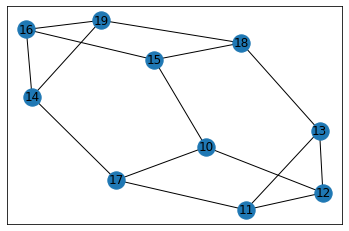

In [8]:
import cirq.contrib.routing as ccr

uncompiled_c_graph = ccr.get_circuit_connectivity(circuit)
nx.draw_networkx(uncompiled_c_graph)

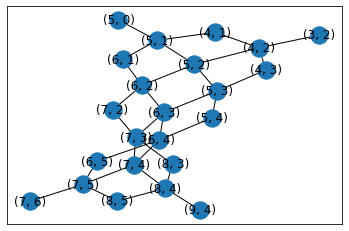

In [12]:
import cirq.google as cg

dev_graph = ccr.xmon_device_to_graph(cg.Sycamore23)
nx.draw_networkx(dev_graph)

In [13]:
# alias for the device. If this notebook were wrapped
# in a function, `circuit` and `device` would be the arguments
device = cg.Sycamore23

In [15]:
index_to_qubit = sorted(device.qubit_set())
qubit_to_index = {q: i for i, q in enumerate(index_to_qubit)}

In [16]:
import pytket
from pytket.circuit import Node

def _qubit_index_edges():
    dev_graph = ccr.xmon_device_to_graph(device)
    for n1, n2 in dev_graph.edges:
        #yield Node('q', n1.row, n1.col), Node('q', n2.row, n2.col)
        yield (qubit_to_index[n1], qubit_to_index[n2])

def _device_to_tket_device():
    arc = pytket.routing.Architecture(
        list(_qubit_index_edges())
    )
    return pytket.device.Device({}, {}, arc)

tk_circuit = pytket.cirq.cirq_to_tk(circuit)
tk_device = _device_to_tket_device()

In [28]:
print(circuit)

            ┌───┐       ┌───┐┌───────────┐┌───┐┌──────────┐┌───┐┌───────────┐»
 q_0: ──────┤ H ├───────┤ X ├┤ U1(-pi/4) ├┤ X ├┤ U1(pi/4) ├┤ X ├┤ U1(-pi/8) ├»
         ┌──┴───┴───┐   └─┬─┘└───────────┘└─┬─┘└──┬───┬───┘└─┬─┘└───────────┘»
 q_1: ───┤ U1(pi/4) ├─────■─────────────────■─────┤ H ├──────┼───────────────»
         ├──────────┤                             └───┘      │               »
 q_2: ───┤ U1(pi/8) ├────────────────────────────────────────■───────────────»
        ┌┴──────────┤                                                        »
 q_3: ──┤ U1(pi/16) ├────────────────────────────────────────────────────────»
        ├───────────┤                                                        »
 q_4: ──┤ U1(pi/32) ├────────────────────────────────────────────────────────»
        ├───────────┤                                                        »
 q_5: ──┤ U1(pi/64) ├────────────────────────────────────────────────────────»
        ├───────────┴┐                              

In [17]:
INDEX_CONNECTION_LIST = {"Ourense": [(0, 1), (1, 2), (1, 3), (3, 4)],
                       "54QBT": [(0, 6), (1, 6), (1, 7), (2, 7), (2, 8), (3, 8), (3, 9), (4, 9), (4, 10), (5, 10), (5, 11),
                                    (6, 12), (6, 13), (7, 13), (7, 14), (8, 14), (8, 15), (9, 15), (9, 16), (10, 16), (10, 17), (11, 17),
                                    (12, 18), (13, 18), (13, 19), (14, 19), (14, 20), (15, 20), (15, 21), (16, 21), (16, 22), (17, 22), (17, 23),
                                    (18, 24), (18, 25), (19, 25), (19, 26), (20, 26), (20, 27), (21, 27), (21, 28), (22, 28), (22, 29), (23, 29),
                                    (24, 30), (25, 30), (25, 31), (26, 31), (26, 32), (27, 32), (27, 33), (28, 33), (28, 34), (29, 34), (29, 35),
                                    (30, 36), (30, 37), (31, 37), (31, 38), (32, 38), (32, 39), (33, 39), (33, 40), (34, 40), (34, 41), (35, 41),
                                    (36, 42), (37, 42), (37, 43), (38, 43), (38, 44), (39, 44), (39, 45), (40, 45), (40, 46), (41, 46), (41, 47),
                                    (42, 48), (42, 49), (43, 49), (43, 50), (44, 50), (44, 51), (45, 51), (45, 52), (46, 52), (46, 53), (47, 53)],
                       "53QBT": [(0, 1), (1, 2), (2, 3), (3, 4),
                                     (0, 5), (4, 6), (5, 9), (6, 13),
                                     (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15),
                                     (7, 16), (11, 17), (15, 18), (16, 19), (17, 23), (18, 27),
                                     (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27),
                                     (21, 28), (25, 29), (28, 32), (29, 36),
                                     (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38),
                                     (30, 39), (34, 40), (38, 41), (39, 42), (40, 46), (41, 50),
                                     (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50),
                                     (44, 51), (48, 52)],
                       "20QBT": [(0, 1), (1, 2), (2, 3), (3, 4),
                                 (0, 5), (1, 6), (1, 7), (2, 6), (2, 7), (3, 8), (3, 9), (4, 8), (4, 9),
                                 (5, 6), (6, 7), (7, 8), (8, 9),
                                 (5, 10), (5, 11), (6, 10), (6, 11), (7, 12), (7, 13), (8, 12), (8, 13), (9, 14),
                                 (10, 11), (11, 12), (12, 13), (13, 14),
                                 (10, 15), (11, 16), (11, 17), (12, 16), (12, 17), (13, 18), (13, 19), (14, 18), (14, 19),
                                 (15, 16), (16, 17), (17, 18), (18, 19)],
                       "16QBT": [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7),
                                   (0, 8), (3, 11), (4, 12), (7, 15),
                                   (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15)]
                       }

In [12]:
print(yee)

In [ ]:
#